In [121]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

# **Importing Libraries**

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
import seaborn as sns
import sklearn

In [123]:
import os

In [124]:
data_url = "https://drive.google.com/uc?export=download&id=1MIfp-SDqb6jbR9fX8mZ8aKg4TI7ighgQ"
df = pd.read_csv(data_url)
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# **Dataset Description**

In [125]:
df.shape

(51012, 10)

In [126]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,2016.967733,16786.208127,23874.835901,118.150043,56.385425,1.670866
std,2.154065,9963.982505,21502.554460,65.360378,18.470537,0.598870
min,1996.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,9999.000000,7898.750000,125.000000,47.900000,1.200000
50%,2017.000000,14490.000000,18300.500000,145.000000,56.500000,1.600000
75%,2019.000000,20481.000000,33161.500000,145.000000,64.200000,2.000000
max,2060.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [127]:
df.shape

(51012, 10)

# **Exploratory Data Analysis**

In [128]:
print(df.columns)

Index(['brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize'],
      dtype='object')


In [129]:
df.dtypes
#types of data

,0
brand,object
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


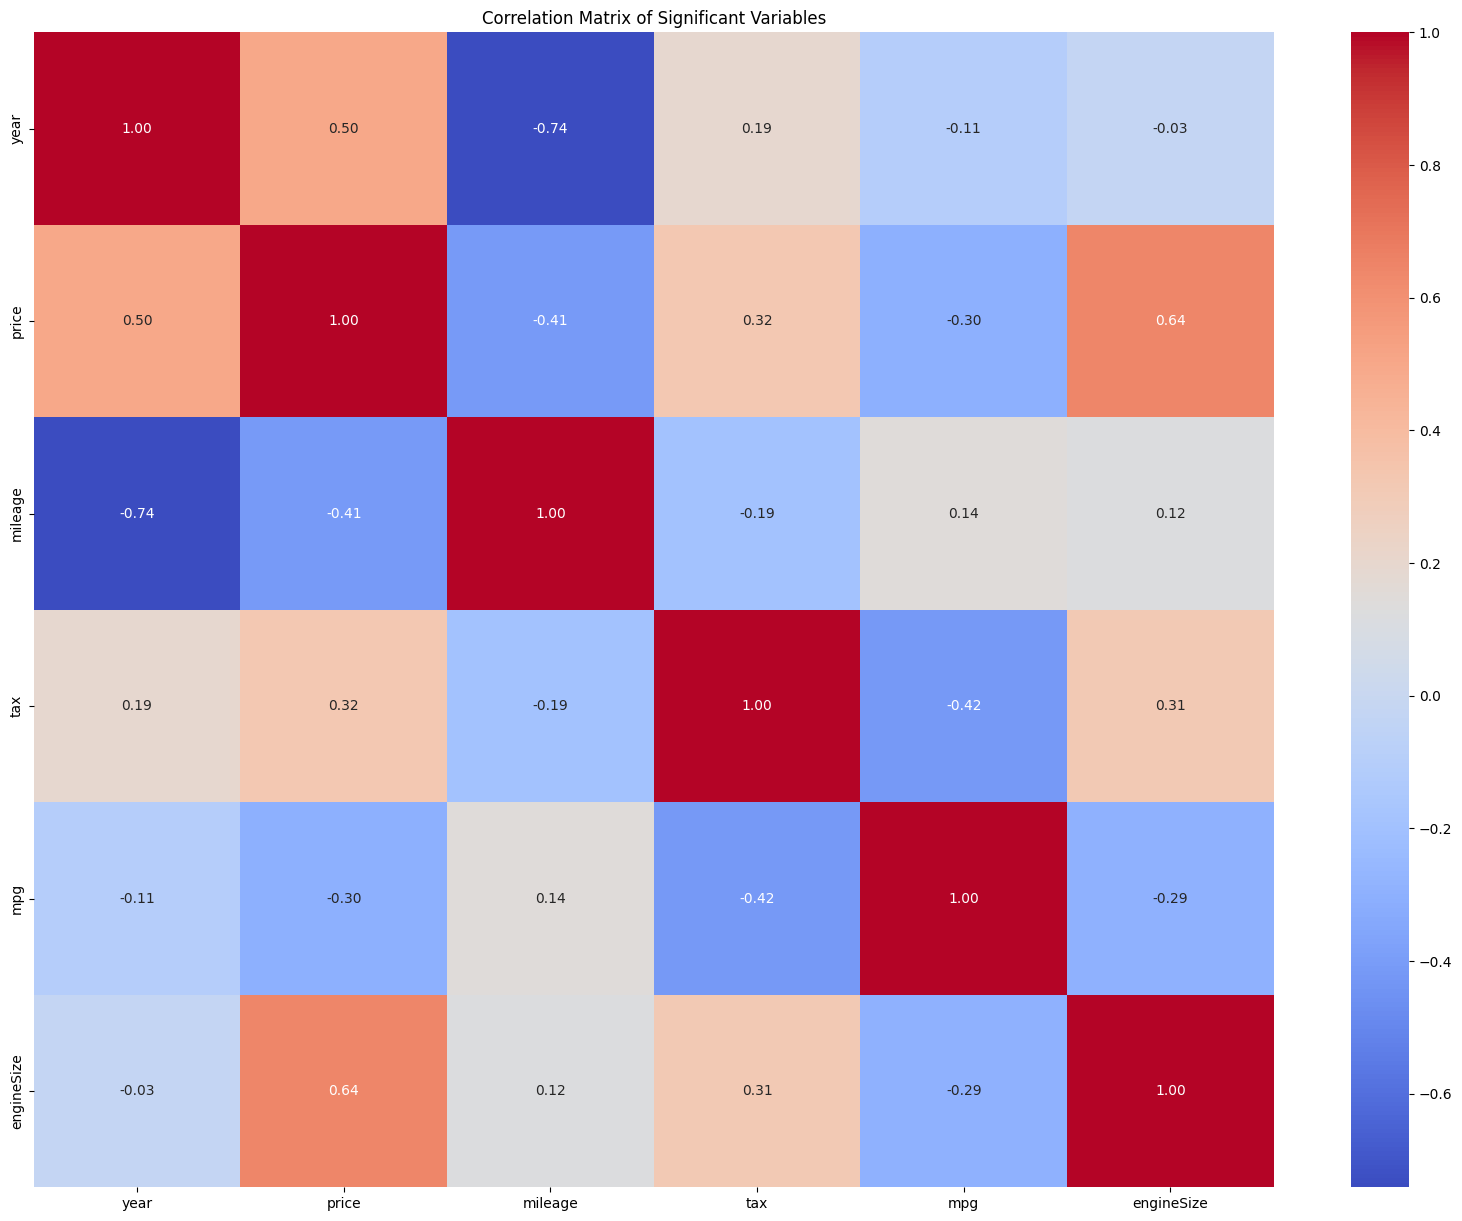

In [130]:
eda_columns = df.select_dtypes(include=['int64','float64']).columns

eda_data = df[eda_columns]

# Generate summary statistics
summary_stats = eda_data.describe()

correlation_matrix = eda_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Significant Variables')
plt.show()

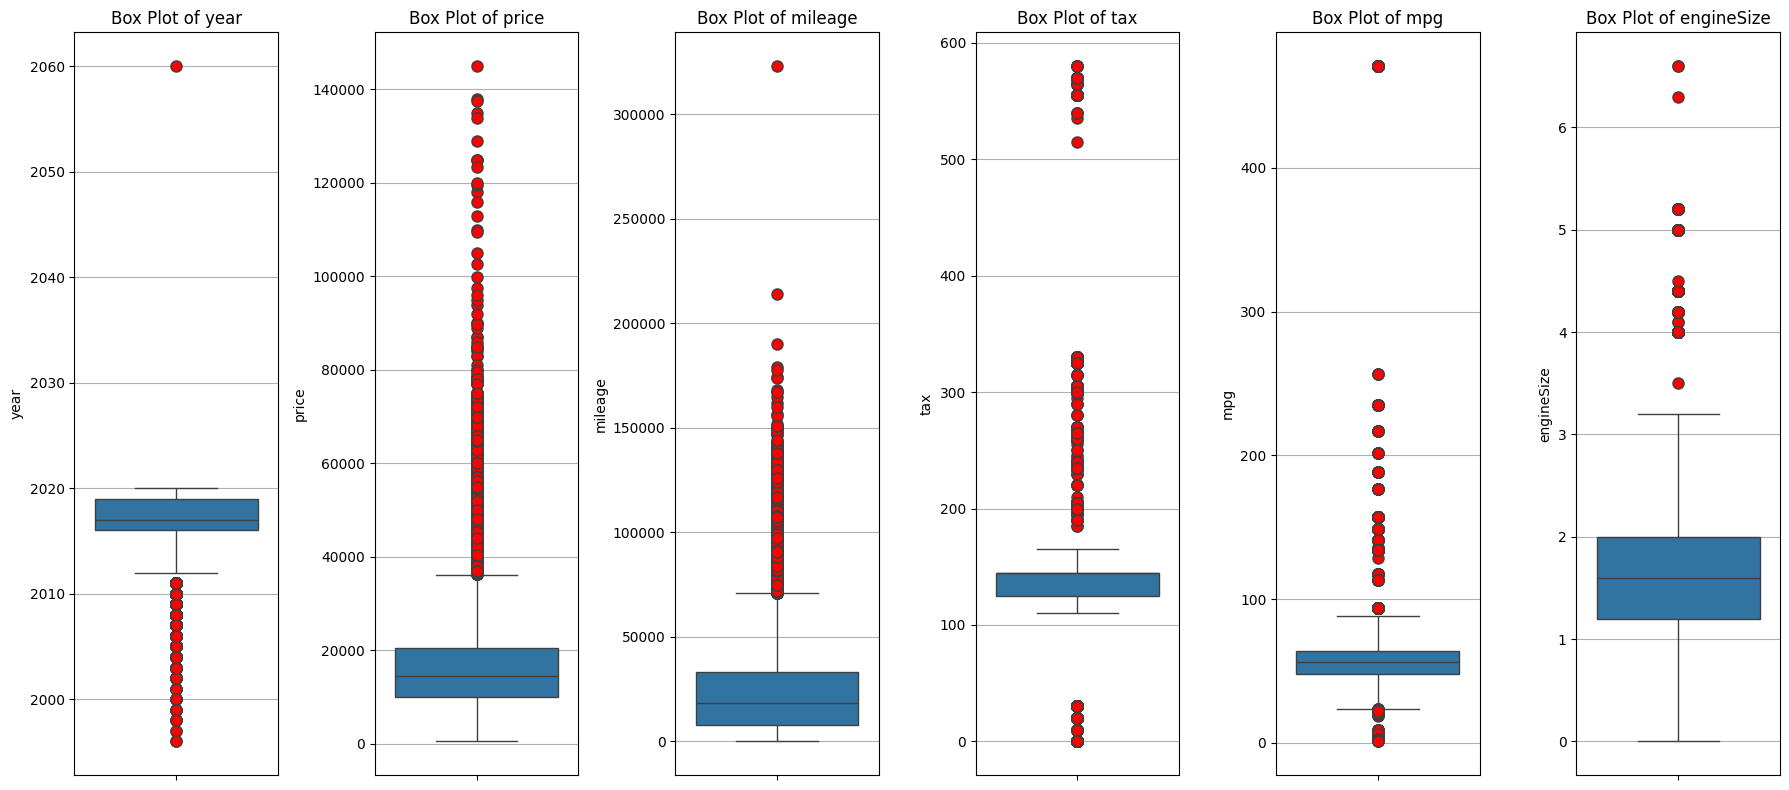

In [131]:
plt.figure(figsize=(18, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)


    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [132]:
df_outliers = df

In [133]:
print(df_outliers.columns)


Index(['brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize'],
      dtype='object')


In [134]:
columns = ['year', 'price', 'mileage', 'tax' , 'mpg','engineSize']
outlier_counts = {}

for col in columns:
    z_scores = np.abs((df_outliers[col] - df_outliers[col].mean()) / df_outliers[col].std())
    outlier_counts[col] = (z_scores > 3).sum()

print("Outlier counts using Z-score:", outlier_counts)

Outlier counts using Z-score: {'year': 760, 'price': 1018, 'mileage': 862, 'tax': 226, 'mpg': 331, 'engineSize': 341}


In [135]:
# Identify and remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter the data
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage
numeric_columns = ['year', 'price', 'mileage', 'tax' , 'mpg','engineSize']
df_cleaned = remove_outliers_iqr(df_outliers, numeric_columns)


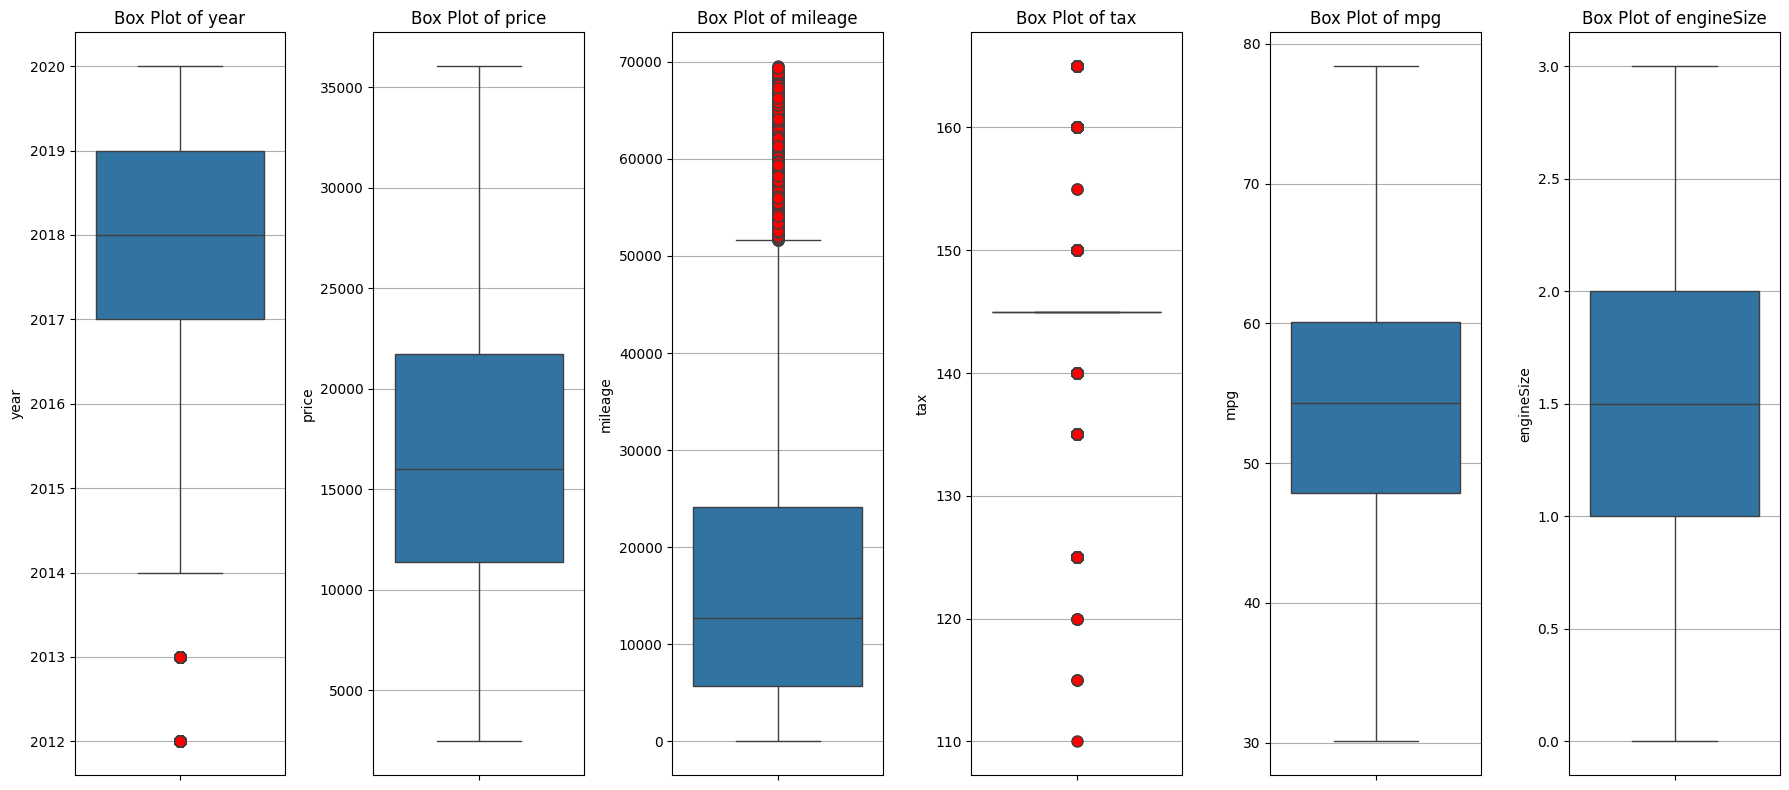

In [136]:
plt.figure(figsize=(18, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)


    if pd.api.types.is_numeric_dtype(df_cleaned[column]):
        sns.boxplot(y=df_cleaned[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [137]:
df_cleaned.shape

(31842, 10)

# **Data Preprocessing**

In [202]:
updated_df = df_cleaned

In [203]:
#checking null values
updated_df.isna().sum()

,0
brand,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [204]:
#checking null values
updated_df.isna().sum()

,0
brand,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [205]:
updated_df.shape

(31842, 10)

In [206]:
#duplicate values
updated_df.duplicated().sum()

377

In [207]:
updated_df = updated_df.drop_duplicates()

In [208]:
updated_df.shape

(31465, 10)

In [209]:
updated_df.dtypes

,0
brand,object
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


In [210]:
# Selecting columns with object datatypes
string_columns = updated_df.select_dtypes(include=['object'])
string_columns.head()

,brand,model,transmission,fuelType
0,audi,A1,Manual,Petrol
3,audi,A4,Automatic,Diesel
4,audi,A3,Manual,Petrol
10,audi,A3,Manual,Petrol
11,audi,A6,Automatic,Diesel


In [211]:
updated_df['brand'].unique()

array(['audi', 'bmw', 'toyota', 'ford', 'other'], dtype=object)

In [212]:
updated_df['brand'].value_counts()

,count
brand,
ford,12235
bmw,6562
audi,6108
toyota,3455
other,3105


In [213]:
make_type_variables = pd.get_dummies(updated_df['brand'], dtype = int)
make_type_variables.head()

,audi,bmw,ford,other,toyota
0,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
10,1,0,0,0,0
11,1,0,0,0,0


In [214]:
updated_df = pd.concat([updated_df, make_type_variables], axis = 1)
updated_df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,audi,bmw,ford,other,toyota
0,audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,0,0,0
3,audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0,0,0
4,audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,0,0,0
10,audi,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4,1,0,0,0,0
11,audi,A6,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,1,0,0,0,0


In [215]:
updated_df.shape

(31465, 15)

In [216]:
updated_df = updated_df.drop('brand', axis=1)
updated_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,audi,bmw,ford,other,toyota
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,0,0,0
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,0,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,0,0,0
10,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4,1,0,0,0,0
11,A6,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,1,0,0,0,0


In [217]:
updated_df['model'].value_counts()

,count
model,
Fiesta,4303
other,3105
Focus,2956
Kuga,1918
3 Series,1575
...,...
Urban Cruiser,1
Verso-S,1
Land Cruiser,1


In [218]:
threshold = 800

# Identify rare models
model_counts = updated_df['model'].value_counts()
rare_models = model_counts[model_counts < threshold].index

# Replace with 'Other'
updated_df['model'] = updated_df['model'].replace(rare_models, 'other')

In [219]:
updated_df['model'].value_counts()

,count
model,
other,12332
Fiesta,4303
Focus,2956
Kuga,1918
3 Series,1575
Aygo,1207
Q3,1143
Yaris,1127
1 Series,1106


In [220]:
model_type_variables = pd.get_dummies(updated_df['model'], dtype = int)
model_type_variables.head()

,1 Series,2 Series,3 Series,A3,A4,Aygo,EcoSport,Fiesta,Focus,Kuga,Q3,Yaris,other
0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,1


In [221]:
updated_df = pd.concat([updated_df, model_type_variables], axis = 1)
updated_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,audi,...,A3,A4,Aygo,EcoSport,Fiesta,Focus,Kuga,Q3,Yaris,other
0,other,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,...,0,0,0,0,0,0,0,0,0,1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,...,0,1,0,0,0,0,0,0,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,...,1,0,0,0,0,0,0,0,0,0
10,A3,2017,16100,Manual,28955,Petrol,145,58.9,1.4,1,...,1,0,0,0,0,0,0,0,0,0
11,other,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,1,...,0,0,0,0,0,0,0,0,0,1


In [222]:
updated_df = updated_df.drop('model', axis=1)
updated_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,audi,bmw,...,A3,A4,Aygo,EcoSport,Fiesta,Focus,Kuga,Q3,Yaris,other
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,...,1,0,0,0,0,0,0,0,0,0
10,2017,16100,Manual,28955,Petrol,145,58.9,1.4,1,0,...,1,0,0,0,0,0,0,0,0,0
11,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [223]:
updated_df['transmission'].value_counts()

,count
transmission,
Manual,18557
Semi-Auto,7188
Automatic,5719
Other,1


In [224]:
updated_df = updated_df[updated_df['transmission'] != 'Other']

In [225]:
updated_df['transmission'].value_counts()

,count
transmission,
Manual,18557
Semi-Auto,7188
Automatic,5719


In [226]:
transmission_type_variables = pd.get_dummies(updated_df['transmission'], dtype = int)
transmission_type_variables.head()

,Automatic,Manual,Semi-Auto
0,0,1,0
3,1,0,0
4,0,1,0
10,0,1,0
11,1,0,0


In [227]:
updated_df = pd.concat([updated_df, transmission_type_variables], axis = 1)
updated_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,audi,bmw,...,EcoSport,Fiesta,Focus,Kuga,Q3,Yaris,other,Automatic,Manual,Semi-Auto
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,...,0,0,0,0,0,0,1,0,1,0
3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,...,0,0,0,0,0,0,0,0,1,0
10,2017,16100,Manual,28955,Petrol,145,58.9,1.4,1,0,...,0,0,0,0,0,0,0,0,1,0
11,2016,16500,Automatic,52198,Diesel,125,57.6,2.0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [228]:
updated_df = updated_df.drop('transmission', axis=1)
updated_df.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,audi,bmw,ford,...,EcoSport,Fiesta,Focus,Kuga,Q3,Yaris,other,Automatic,Manual,Semi-Auto
0,2017,12500,15735,Petrol,150,55.4,1.4,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2017,16800,25952,Diesel,145,67.3,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2019,17300,1998,Petrol,145,49.6,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10,2017,16100,28955,Petrol,145,58.9,1.4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11,2016,16500,52198,Diesel,125,57.6,2.0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [229]:
updated_df['fuelType'].value_counts()

,count
fuelType,
Petrol,19394
Diesel,11177
Hybrid,833
Other,60


In [230]:
updated_df = updated_df[updated_df['fuelType'] != 'Other']
updated_df = updated_df[updated_df['fuelType'] != 'Hybrid']

In [231]:
updated_df['fuelType'].value_counts()

,count
fuelType,
Petrol,19394
Diesel,11177


In [232]:
type_variables = pd.get_dummies(updated_df['fuelType'], dtype = int)
type_variables.head()

,Diesel,Petrol
0,0,1
3,1,0
4,0,1
10,0,1
11,1,0


In [233]:
updated_df = pd.concat([updated_df, type_variables], axis = 1)
updated_df.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,audi,bmw,ford,...,Focus,Kuga,Q3,Yaris,other,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,2017,12500,15735,Petrol,150,55.4,1.4,1,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2017,16800,25952,Diesel,145,67.3,2.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,17300,1998,Petrol,145,49.6,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
10,2017,16100,28955,Petrol,145,58.9,1.4,1,0,0,...,0,0,0,0,0,0,1,0,0,1
11,2016,16500,52198,Diesel,125,57.6,2.0,1,0,0,...,0,0,0,0,1,1,0,0,1,0


In [234]:
updated_df = updated_df.drop('fuelType', axis=1)
updated_df.head()

,year,price,mileage,tax,mpg,engineSize,audi,bmw,ford,other,...,Focus,Kuga,Q3,Yaris,other,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10,2017,16100,28955,145,58.9,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11,2016,16500,52198,125,57.6,2.0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [235]:
data = updated_df

In [236]:
data.head()

,year,price,mileage,tax,mpg,engineSize,audi,bmw,ford,other,...,Focus,Kuga,Q3,Yaris,other,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10,2017,16100,28955,145,58.9,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11,2016,16500,52198,125,57.6,2.0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


# **Model Implementation**

In [237]:
X = data.drop('price', axis=1)
y = data['price']

In [238]:
print(X.columns)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'audi', 'bmw', 'ford',
       'other', 'toyota', ' 1 Series', ' 2 Series', ' 3 Series', ' A3', ' A4',
       ' Aygo', ' EcoSport', ' Fiesta', ' Focus', ' Kuga', ' Q3', ' Yaris',
       'other', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel', 'Petrol'],
      dtype='object')


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [240]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21399, 28), (9172, 28), (21399,), (9172,))

In [241]:
print(X_train.dtypes)

year            int64
mileage         int64
tax             int64
mpg           float64
engineSize    float64
audi            int64
bmw             int64
ford            int64
other           int64
toyota          int64
 1 Series       int64
 2 Series       int64
 3 Series       int64
 A3             int64
 A4             int64
 Aygo           int64
 EcoSport       int64
 Fiesta         int64
 Focus          int64
 Kuga           int64
 Q3             int64
 Yaris          int64
other           int64
Automatic       int64
Manual          int64
Semi-Auto       int64
Diesel          int64
Petrol          int64
dtype: object


In [242]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),


    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae'],

)


In [243]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.95 ** epoch)

epoch_number = 100
# Train the model
history = model.fit(X_train, y_train,
          epochs=epoch_number,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[lr_schedule])

Epoch 1/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 16952.0488 - mae: 16952.0488 - val_loss: 15024.5078 - val_mae: 15024.5078 - learning_rate: 0.0100
Epoch 2/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 13936.4150 - mae: 13936.4150 - val_loss: 9699.8652 - val_mae: 9699.8652 - learning_rate: 0.0095
Epoch 3/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 8936.8750 - mae: 8936.8750 - val_loss: 10155.1436 - val_mae: 10155.1436 - learning_rate: 0.0090
Epoch 4/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 5616.4683 - mae: 5616.4683 - val_loss: 27628.1211 - val_mae: 27628.1211 - learning_rate: 0.0086
Epoch 5/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 4016.2754 - mae: 4016.2754 - val_loss: 20855.6465 - val_mae: 20855.6465 - learning_rate: 0.0081
Epoch 6/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 3718.2739 - mae: 3718.2739 - val_loss: 16255.3809 - val_mae: 16255.3809 - learning_rate: 0.0077
Epoch 7/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 14s

In [244]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 1024)                │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 16)                  │              

 Total params: 2,129,925 (8.13 MB)

 Trainable params: 708,705 (2.70 MB)

 Non-trainable params: 3,808 (14.88 KB)

 Optimizer params: 1,417,412 (5.41 MB)

In [245]:
y_prediction = model.predict(X_test)
y_prediction[:5]

287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[20895.465],
       [23172.77 ],
       [25157.945],
       [29015.111],
       [28365.85 ]], dtype=float32)

In [246]:
y_test.head()

,price
6687,25775
14986,23491
13172,25490
2583,26995
19119,27989


# **Evaluation Metrics**

In [247]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test.shape, y_prediction.shape)


(21399, 28) (21399,)
(9172, 28) (9172,)
(9172, 28) (9172, 1)


In [248]:
y_prediction = y_prediction.ravel()

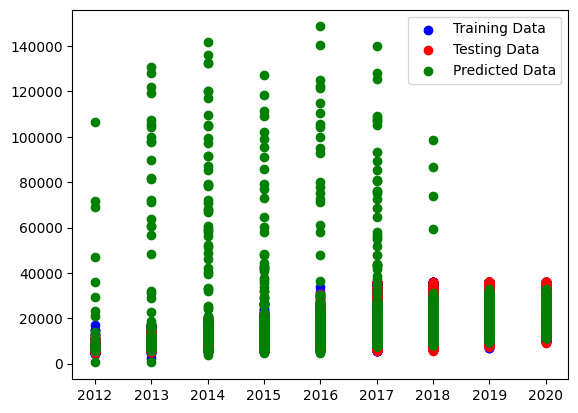

In [249]:
plt.scatter(X_train.iloc[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(X_test.iloc[:, 0], y_test, color='red', label='Testing Data')
plt.scatter(X_test.iloc[:, 0], y_prediction, color='green', label='Predicted Data')
plt.legend()
plt.show()


In [250]:
mae_metric = tf.keras.losses.MeanAbsoluteError()

# Calculate MAE
mae_value = mae_metric(y_test, y_prediction).numpy()

print(f"Mean Absolute Error: {mae_value}")

Mean Absolute Error: 2935.5732421875


In [251]:

mse_metric = tf.keras.losses.MeanSquaredError()


mse_value = mse_metric(y_test, y_prediction).numpy()

print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 92330936.0


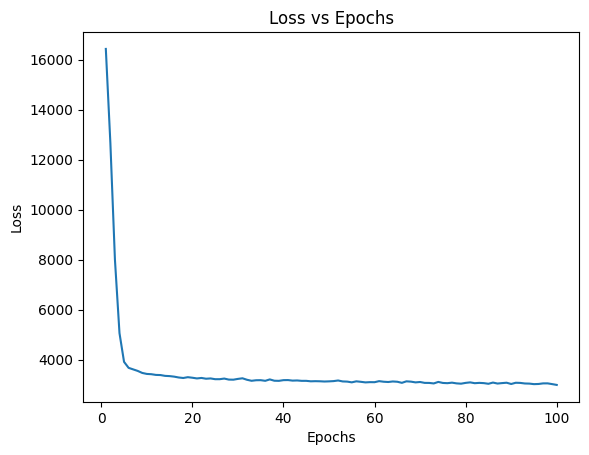

In [252]:
x_range = range(1, epoch_number+1)
loss= history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [253]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate model on testing data
test_score = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Model Performance on Testing Dataset (MAE): {test_score:.4f}")


Model Performance on Testing Dataset (MAE): 2935.5735


In [254]:
from sklearn.metrics import r2_score

# Predict on training data
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Model Accuracy (R²) on Training Dataset: {train_r2 * 100:.4f}%")
print(f"Model Accuracy (R²) on Testing Dataset: {test_r2 * 100:.4f}%")


669/669 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Model Accuracy (R²) on Training Dataset: -89.5924%
Model Accuracy (R²) on Testing Dataset: -86.9841%


In [255]:
import pickle as pk

In [201]:
pk.dump(model,open('PriceModel.pkl','wb'))